# Derivada direccional y funciones diferenciables

In [1]:
import time
print(' Última ejecución ', time.asctime() )

 Última ejecución  Tue Apr 22 15:43:05 2025


### Objectivos

Recordar que la derivada está relacionada con la pendiente de la función.

Presentar los conceptos de:

* derivada direccional de una función escalar.

* funciones diferenciables.

Estudiar la derivada direccional en un plano.

Remarcar que en funciones escalares y vectorales para dar la derivada necesitamos un punto y una dirección de desplazamiento.

Recordaremos que son las funciones "suaves" y la relación del desarrollo de Taylor.


In [2]:
# general imports
%matplotlib inline
%load_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Derivada direccional

En funciones de una dimensión, $f(x)$, la derivada estaba asociada la la "pendiente" de la función en un punto. 

La definición de derivada de una función real en un punto $x$ es:

$$
f'(x) = \lim_{h \to 0} \frac{f(x +h) - f(x)}{h}
$$



Observa la siguiente gráfica de la función escalar $f(x, y) = y - x$. Se trata de un plano
que pasa por el origen y que tiene pendiente $-1$ en $x$ y pendiente $+1$ en $y$.

Puedes ver que si queremos dar la pendiente en un determinado punto $(x_0, y_0)$ tenemos que indicar también en qué dirección queremos calcular esa pendiente $(v_x, v_y)$.



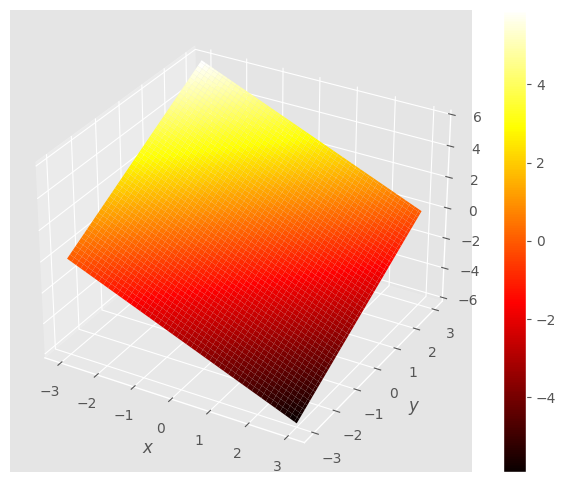

In [3]:
fun = lambda x, y : y - x
gf.graph(fun);

 La siguiente figura muestra los conjuntos de nivel del plano, que son rectas.

Considera por ejemplo el origen $(0, 0)$ y ahora a partir de los conjuntos de nivel, intenta determinar cuál es la pendiente si nos desplazamos en estas direcciones:

i) en $x$, esto es en ${\bf v} = (1, 0)$

ii) en $y$, en ${\bf v} = (0, 1)$
 
iii) en la bisectriz del primer cuadrante ${\bf v} = (1, 1)$

*Experimenta*: cambia la dirección del vector y estudia el cambio de pendiente.

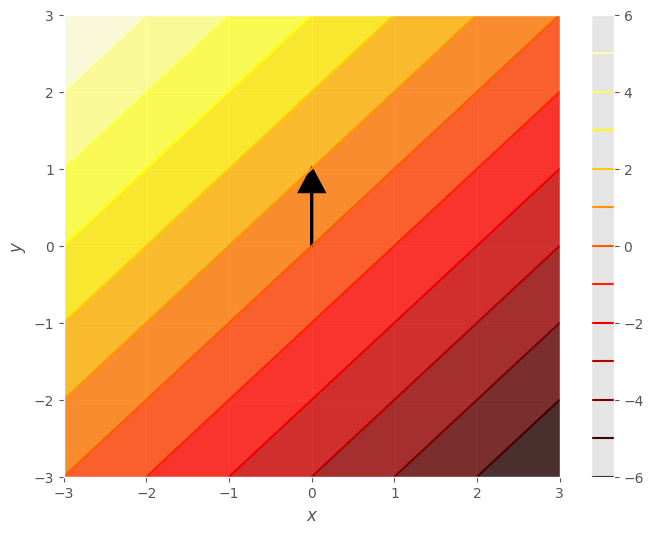

In [4]:
x0, y0 = 0., 0.
vx, vy = 0., 1.
fun = lambda x, y : y - x
gf.contour(fun, contours = 11); 
gf.arrow(x0, y0, vx, vy);

Has podido comprobar que la pendiente cambia con el vector ${\bf v}$.

Para dar la derivada, la pendiente, de funciones escalares necesitamos dar además del punto, ${\bf x}_0$, la dirección, ${\bf v}$ en la que queremos calcularla.

En la siguiente celda dibujamos la gráfica del plano $y-x$ y la seccionamos verticalmente pasando por el punto ${\bf x}_0$, en este caso el origen, $(0, 0)$, y en una determinada dirección ${\bf v}$, en este caso ${\bf v} = (1, 0)$. 

*Explora*: cambia el vector ${\bf v}$ para ver como cambia la sección de la gráfica.

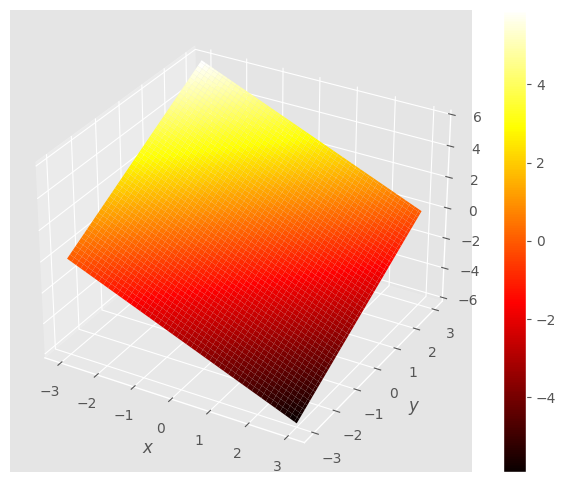

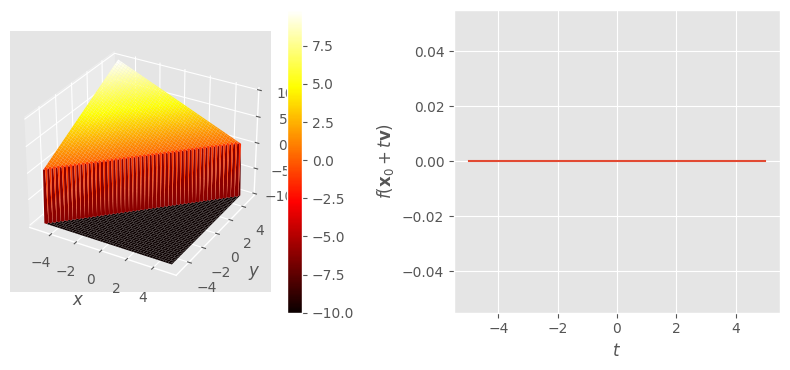

In [5]:
x0, y0 = 0., 0.
vx, vy = 1., 1.
fun = lambda x, y: y - x
gf.graph(fun)
gf.graph_section(fun, x0, y0, vx, vy, sign = -1);

*Explora*: observa como son las secciones y las pendientes en un punto y una dirección con la función $f(x, y) = y^2 - x^2$.

*Explora*: cambia la función y estudia de nuevo las pendientes.

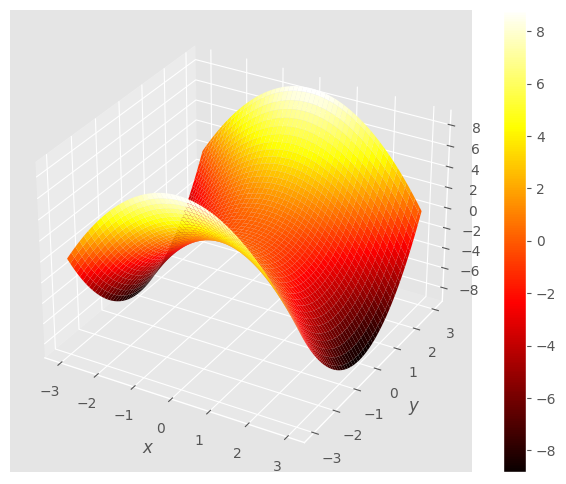

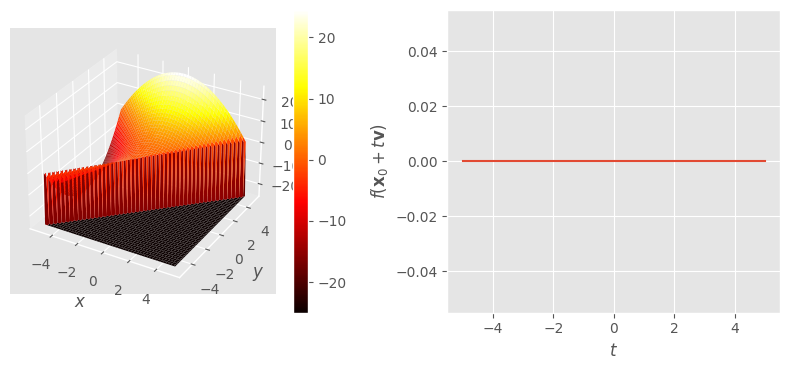

In [6]:
x0, y0 = 0., 0.
vx, vy = 1., 1.
fun = lambda x, y: y*y - x*x
gf.graph(fun)
gf.graph_section(fun, x0, y0, vx, vy, sign = -1);

Definimos la **derivada direccional**, $f'({\bf x}; {\bf v})$ , de una función escalar, $f({\bf x})$, en un punto, ${\bf x}_0$ y dirección, ${\bf v}$, como:

$$
f'({\bf x}_0; \, {\bf v}) = \lim_{h \to 0} \frac{f({\bf x}_0 + h {\bf v}) - f({\bf x}_0)}{h}
$$

La derivada direccional de una función $f({\bf x})$, es la pendiente de la función en ${\bf x}_0$ y en la dirección ${\bf v}$, que la calculamos a partir de la razón entre diferencia del valor de la función en un punto ${\bf x}_0 + h {\bf v}$ y en el punto de referencia ${\bf x}_0$, y la distancia $h$ que hacemos tender a cero, de tal forma que los dos puntos están infinitésimamente próximos. 

Date cuenta que en la derivada direccional aparece explícitamente la dirección ${\bf v}$.

En la figura enterior, la derivada, $f'({\bf x}_0; \; {\bf v})$ corresponde a la pendiente en ${\bf x}_0$; y en la gráfica de $f({\bf x}_0 + t {\bf v})$ vs $t$, a la pendiente en $t=0$, en negrita.

*Ejemplo*: Vamos a calcular la derivada direccional del plano $f(x, y) = y - x$  en el origen y en las direcciones $(1, 0), \; (0, 1), \; (1, 1)$.


Calculamos:

$$
f'((0, 0), \; (v_x, v_y)) = \lim_{h\to 0} \frac{f(h v_x, \, h  v_y) - \,f (0,0)}{ h}
$$

donde $ f(x, y) = y - x$:

$$
f(h v_x,h  v_y) = h v_y -  h v_x = h (v_y - v_x), \;\;\; f(0, 0) = 0
$$

i) para el vector $(1, 0)$:

$$
f'((0, 0) ; \, (1, 0)) = \lim_{h \to 0} \frac{-h}{h} = -1
$$

ii) para el vector $(0, 1)$:

$$
f'((0, 0) ; \, (0, 1)) = \lim_{h \to 0} \frac{h}{h} = 1
$$

iii) para el vector $(1, 1)$:

$$
f'((0, 0) ; \, (1, 1)) = \lim_{h \to 0} \frac{h (1 -1)}{h} = 0
$$


iv) y para un vector genérico $(v_x, v_y)$:

$$
f'((0, 0) ; \, (v_x, v_y)) = \lim_{h \to 0} \frac{h (v_y - v_x)}{h} = v_y - v_x
$$

En concreto, para $(v_x, 0)$ y $(0, v_y)$:

$$
f'((0, 0) ; \, (v_x, 0)) = - v_x, \;\;\; f'((0, 0) ; \, (0, v_y)) = v_y 
$$




Fíjate que en este caso, la derivada direccional es una aplicación lineal. 

$$
f'((0, 0); \, (v_x, v_y)) = f'((0,0); \, (v_x,0)) \, + \, f'((0, 0); \,(0, v_y))
$$

$$
f'((0, 0); \, \lambda (v_x, v_y)) = \lambda \, f'((0, 0); \, (v_x, v_y))
$$

Esto es, la suma de la derivada direccional de $v_x$ en $x$ y la derivada diracción en $v_y$ en $y$, es la derivada dirección en la dirección $(v_x, v_y)$.



*Ejercicio*: calcula la derivada direccional de la función $f(x, y) = 9 - x^2 - y^2$ en $(1, 1)$ y las direcciones $(1, 0)$ y $(0, 1)$.




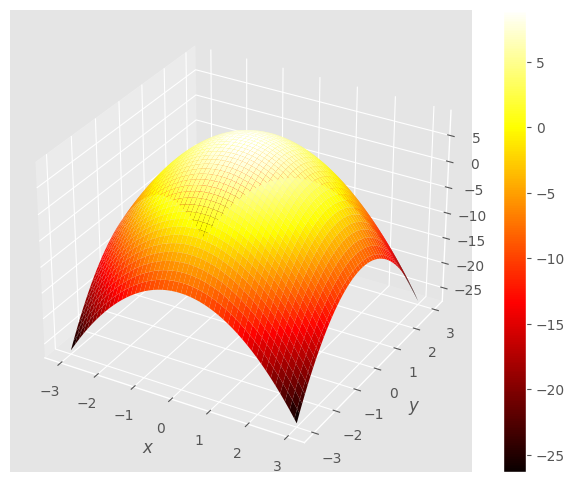

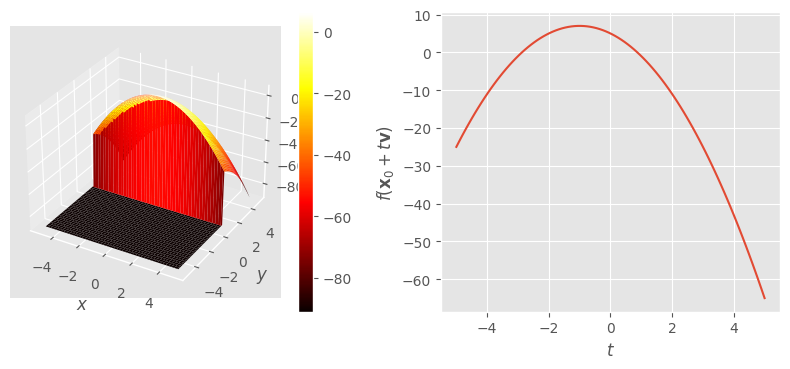

In [7]:
x0, y0 = 1., 1.
vx, vy = 1., 0.
fun = lambda x, y: 9 - 2.*y*y - 2.*x*x
gf.graph(fun)
gf.graph_section(fun, x0, y0, vx, vy, sign = -1);

La función es: $f(x, y) = 9 -x^2 - y^2$

Calculamos:

$$
f(1, 1) = 9-1-1=7
$$

Y 

$$
f((1, 1)+ h(1, 0)) = f(1+h, 1) = 9 - (1+h)^2 - 1 = 8 -1-2h-h^2= 7 -2h - h^2
$$




Y ahora la derivada direccional la dirección $(1, 0)$ en el punto $(1, 1)$:

$$
f'((1, 1);\; (1, 0)) = \lim_{h \to 0} \frac{f((1, 1)+ h(1, 0)) - f(1,1)}{h} =
\lim_{h \to 0}  \frac{7-2h-h^2 -7}{h} = -2
$$



Para

$$
f((1, 1)+ h(0, 1)) = f(1, 1+h) = 9 -1 - (1+h)^2  = 8 -1 - 2h -h^2 = 7 -2h - h^2
$$


Y la derivada dirección en la dirección $(1, 0)$ en el punto $(1, 1)$:

$$
f'((1, 1);\; (0, 1)) = \lim_{h \to 0} \frac{f((1, 1)+ h(0, 1)) - f(1,1)}{h} =
\lim_{h \to 0}  \frac{7-2h-h^2 -7}{h} = -2
$$

Las dos coinciden.




***
#### Derivadas parciales

Llamaremos **derivadas parciales** de una función escalar en un punto a las derivadas direccionales en los ejes coordenados. 

En el caso anterior, la derivada parcial con respecto a $x$ es:

$$
f'_x (x, y) = \frac{\partial f(x, y)}{ \partial x} = f'((x, y); \, (1, 0))
$$

y con respecto a $y$:

$$
f'_y (x, y) = \frac{\partial f(x, y)}{ \partial y} = f'((x, y); \, (0, 1))
$$

Date cuenta de que usamos distintas notaciones con igual significado.


Para calcular las derivadas direccionales podemos valernos de los métodos de derivación de funciones reales de una dimensión.

Si calculamos la derivada parcial respecto a $x$, consideramos la $y$ como una constante en la expresión de la función, y derivaremos normalmente respecto a $x$.

Considera la función:

$$
f(x, y) = 9 -x^2 - y^2
$$

Las derivadas parciales serán:

$$
f'_x (x, y) = -2 x, \;\, f'_y(x, y) = -2 y
$$
 
Si las valoramos en el punto $(1, 1)$, obtenemos:

$$ 
f'_x(1, 1) = -2, \;\, f'_y(1, 1) = -2
$$

Lo mismo que obtuvimos antes  a partir de la definición de derivada direccional.  

***
#### Derivadas segundas

Cada derivada parcial es una función escalar a la que a su vez podemos calcular sus derivadas parciales, que llamaremos **derivadas segundas**.

$$
f''_x = \frac{\partial^2 f(x, y)}{\partial x^2}, \;\;
f''_y = \frac{\partial^2 f(x, y)}{\partial y^2}, \;\;
$$

y las derivadas segundas cruzadas:
 
$$
f''_{xy} = \frac{\partial^2 f(x, y)}{\partial x \partial y}, \;\;
f''_{yx} = \frac{\partial^2 f(x, y)}{\partial y\partial x}, \;\;
$$

En general las derivadas parciales cruzadas serán iguales, pero no necesariamente.

$$
 \frac{\partial^2 f(x, y)}{\partial x \partial y} \neq  \frac{\partial^2 f(x, y)}{\partial y \partial x}
$$

   


En el ejemplo anterior, siendo la función escalar: $f(x, y) = 9 -x^2 -y^2$. 

Ya habíamos calculado sus derivadas parciales:

$$
f'_x (x, y) = -2 x, \;\, f'_y(x, y) = -2 y
$$

Y sus derivadas segundas son:

$$
f''_x (x, y) = -2 , \;\, f''_y(x, y) = -2 
$$

$$
f''_{xy} (x, y) =  f''_{yx} (x, y) = 0
$$

*Ejercicio*: calcula las derivadas parciales segundas de la siguiente función:

$$
f(x, y) = e^x \cos y
$$

*Solución*:
    
Las derivadas parciales son:

$$
f'_x (x, y) = e^x \cos y, \;\; f'_y (x, y) = - e^x \sin y
$$

Y las derivadas segundas:

$$
f''_x (x, y) = e^x \cos y, \;\; f''_y (x, y) = - e^x \cos y
$$

Y las derivadas segundas cruzadas:

$$
f''_{xy} (x, y) = - e^x \sin y, \;\; f''_{yx} (x, y) =  - e^x \sin y
$$




***
#### ¡Malditas funciones raras!

Estudia ahora la siguiente función:

$$
f(x,y) = \left \{
\begin{array}{ l l}
x+y & \quad \mbox{si $x=0$ o $y=0$} \\
1 & \quad \mbox{en cualquier otro caso} \\
\end{array}
\right.
$$

*Ejercicio*: comprueba que en el origen tiene derivadas parciales, ¡pero no tiene derivadas en cualquier otra dirección!


Estudia ahora esta función, que es incluso peor:

$$
f(x,y) = \left \{
\begin{array}{ l l}
x+y & \quad \mbox{si $x=0$ o $y=0$} \\
0 & \quad \mbox{en cualquier otro caso} \\
\end{array}
\right.
$$

*Ejercicio*: comprueba que en el origen, esta función es continua, tiene derivadas parciales y todas las direccionales, pero su gráfica es endemoniada, no es en absoluto "suave".


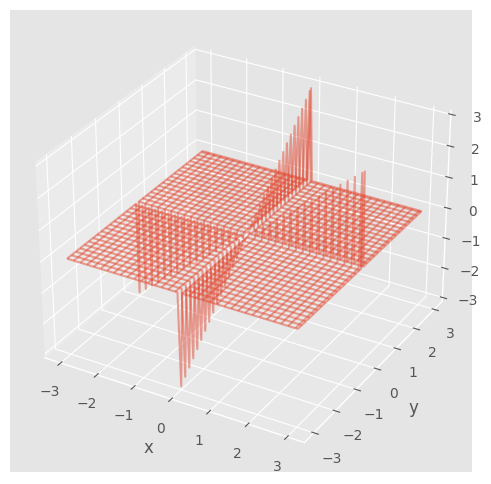

In [8]:
xs = np.linspace(-3., 3., 101)
ys = np.linspace(-3., 3., 101)
xms, yms = np.meshgrid(xs, ys)
a = 0.
zms = 0.*xms + 0.*yms +a
sel = (xms == 0); zms[sel] = xms[sel] + yms[sel]
sel = (yms == 0); zms[sel] = xms[sel] + yms[sel]
fig = plt.figure(figsize=(8, 6)); ax = plt.axes(projection='3d')
ax.plot_wireframe(xms, yms, zms, alpha = 0.5);
ax.set_xlabel('x'); ax.set_ylabel('y'); #ax.set_aspect('equal');

### Funciones diferenciables

En funciones reales en 1D, decíamos que una función era diferenciable si era **"suave"**: si era continua, no tenía ni dobleces, ni quiebros.

En otras palabras, era diferenciable si admitía el **desarrollo de Taylor**. 

En primer orden, el desarrollo de Taylor de en una función real de 1D nos permitía aproximar, en un valor $x$ "cercano" a $x_0$ la función por una recta tangente con pendiente $f'(x_0)$, la derivada en $x_0$. 

$$
f(x) \approx f(x_0) + f'(x_0) \, (x - x_0) 
$$

Recuerda que la ecuación de una recta que pasa por el punto $(x_0, y_0)$ con pendiente $a$ viene dada por:

$$
y(x) = y_0 + a \, (x-x_0)
$$

La derivada es la pendiente de la función en un punto. 

En la siguiente figura hemos dibujado la función $f(x) = x^2$ y el desarrollo de Taylor en el punto $x_0$. Puedes observar que en una pequeña región la recta y la función se superponen. 

*Explora* cambiando el valor de $x_0$.

Es claro que $f(x)$ es "suave".

*Cuestión*: Invéntante una función de 1D que no sea "suave", no sea diferenciable.

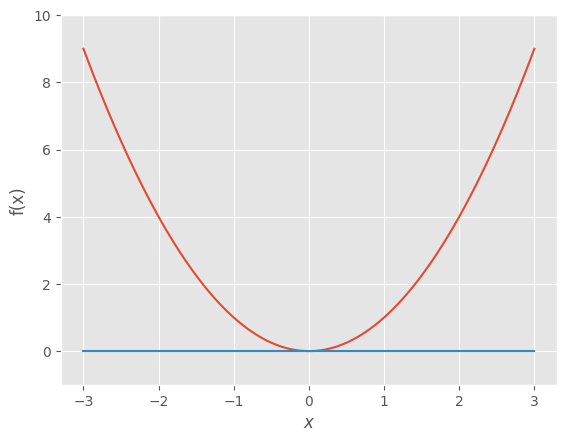

In [9]:
x0 =  0.
fun    = lambda x : x*x
fp     = lambda x : 2.*x
taylor = lambda x : fun(x0) + fp(x0) * (x -x0)
gf.fun1d(fun);
gf.fun1d(taylor, newfig = False);
plt.ylim(-1., 10.);

Consideremos ahora una función escalar de dos dimensiones, diremos que es "suave" si su gráfica es continua (no está quebrada), no tiene dobleces, ni picos.

Observa la gráfica de este función, ¿consideras que es "suave"? ¿está rasgada, tiene dobleces, picos?

$$
f(x, y) = 9 - x^2 - y^2
$$

Ciertamente es "suave"


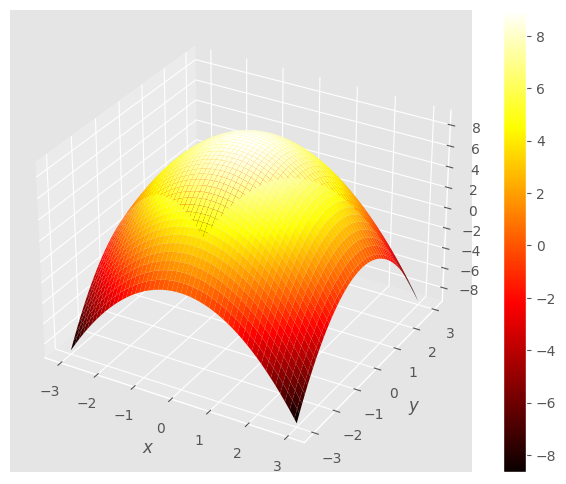

In [10]:
fun = lambda x, y : 9 - x*x - y*y
gf.graph(fun);

Las funciones escalares de dos dimensiones serán diferenciables si podemos hacer su desarrollo de Taylor de primer orden.

Que en este caso significa que en una región "pequeña", en un punto $(x, y)$ "próximo" al punto $(x_0, y_0)$, la gráfica de la función puede aproximarse por **un plano tangente**, cuya pendiente en la dirección $x$ correspondera a su derivada parcial en $x$ en ese punto, $f'_x(x_0, y_0)$ y la pendiente en la dirección $y$, a la derivada parcial en $y$, $f'_y (x_0, y_0)$.

El desarrollo de Taylor de primer orden será:

$$
f(x, y) \approx f(x_0, y_0) + f'_x(x_0, y_0) \,  (x-x_0) + f'_y(x_0, y_0) \,( y - y_0) 
$$

Recuerda que la ecuación de un plano que pasa por $(x_0, y_0, z_0)$, con pendientes $a$ en la dirección $x$ y $b$ en la dirección $y$, viene dada por:

$$
z(x, y) = z_0 + a (x - x_0) + b (y - y_0)
$$

donde identificamos rápidamente:

$$
a = f'_x (x_0, y_0), \; b = f'_y (x_0, y_0), \; z_0 = f(x_0, y_0)
$$

que son, claro está, las derivadas parciales.

Observa la gráfica de la función:

$$
f(x, y) = 9 -x^2 - y^2
$$

sobre la que hemos dibujado, en un punto $(x_0, y_0)$, el plano que corresponde a su desarrollo de Taylor de primer orden.

$$
f(x, y) \approx f(x_0, y_0) + f'_x(x_0, y_0) \,  (x-x_0) + f'_y(x_0, y_0) \,( y - y_0) 
$$

*Explora*: cambia el punto y observa cómo el desarrollo del Taylor, el plano tangente, cubre, solapa la gráfica en una región alrededor del $(x_0, y_0)$. Algo similar a lo que ocurría con la recta en una función de una dimensión.





En este caso:

$$
f(x_0, y_0) = 9 -x^2_0 - y^2_0, \;\, f'_x(x_0, y_0) = -2 x_0, \;\; f'_y(x_0, y_0) = -2 y_0
$$

luego el desarrollo de Taylor en torno al punto $(x_0, y_0)$ es:

$$
f(x, y) \approx 9 -x^2_0 - y^2_0 - 2 x_0 (x - x_0) - 2 y_0 ( y - y_0)
$$


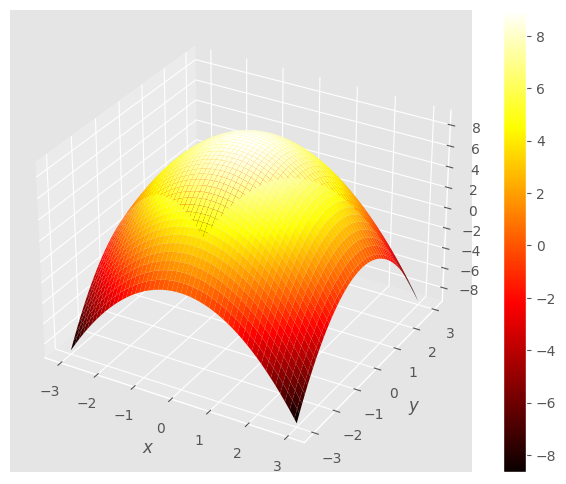

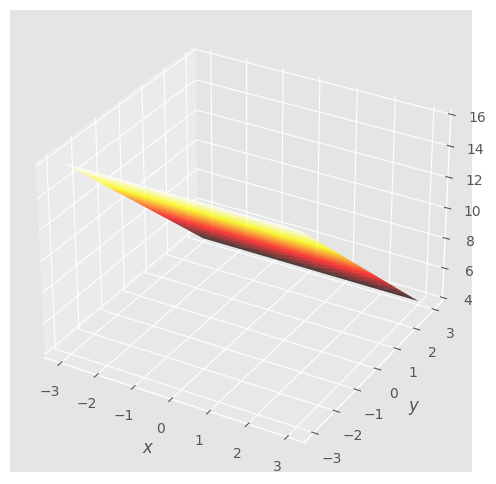

In [11]:
%matplotlib inline
x0, y0 = 0, 1.
fun    = lambda x, y: 9 - x*x - y*y
fpx    = lambda x, y: -2.*x + 0 * y
fpy    = lambda x, y: -2.*y + 0 * x
taylor = lambda x, y: fun(x0, y0) + fpx(x0, y0) * (x - x0) + fpy(x0, y0) * (y -y0)
gf.graph(fun);
gf.graph(taylor, newfig = False);

*Ejercicio* Calcula el desarrollo de Taylor en el origen del plano $y -x$ y verifica que es el mismo. 

Tomemos el plano anterior: $f(x, y) = y -x $.

En el origen, $f(0, 0) = 0$, y las derivadas direccionales son:

$$
f'_x(x, y) = -1, \;\, f'_y(x, y) = 1
$$

Luego el desarrollo de Taylor en $(0,0)$ es: $f(x, y) = y - x $ 

*Cuestión* ¿Y en cualquier otro punto?

*Las derivadas direccionales de una función diferenciables tienen una expresión sencilla.*

Consideremos nuevamente una función $f(x, y)$ diferenciable en $(x_0, y_0)$.

Reescribimos ahora el punto próximo $(x, y)$ por $(x_0, y_0) + (v_x, v_y)$, donde $(v_x, v_y)$ es un vector "pequeño".

$$
(x, y) = (x_0, y_0) + (v_x, v_y)
$$

Podemos aproximar la función:

$$
f((x_0, y_0) + (v_x, v_y)) \approx f(x_0, y_0) + f'_x(x_0, y_0) v_x + f'_y(x_0, y_0) v_y
$$



Calculemos ahora la derivada direccional en $(x_0, y_0)$ en la dirección $(v_x, v_y)$:

$$
f'((x_0, y_0); (v_x, v_y)) = \lim_{h \to 0} \frac{f((x_0, y_0) + h (v_x, v_y)) - f(x_0, y_0)}{h}
$$

$$
 = \lim_{h \to 0} \frac{f(x_0, y_0) + h f'_x(x_0, y_0) v_x + h f'_y (x_0, y_0)  v_y - f(x_0, y_0)}{h}
$$

Por lo tanto:

$$
f'((x_0, y_0); \, (v_x, v_y)) =  f'_x(x_0, y_0) v_x + f'_y (x_0, y_0)  v_y
$$

Si la función es diferenciable, la derivada direccional en $(x_0, y_0)$ y con dirección $(v_x, v_y)$ se puede obtener a partir de sus derivadas parciales y además es lineal en $(v_x, v_y)$.



*Ejercicio*: calcula la derivada direccional de la función diferenciable $f(x, y) = 9 -x^2 - y^2$ en el punto $(1, 1)$ y la dirección $(1, 1)$ a partir de sus derivadas parciales.

Las derivadas parciales son:

$$
f'_x(x, y) = -2x, \; f'_y(x, y) = -2y
$$

En el punto $(1, 1)$ valen:

$$
f'_x(1, 1) = -2, \; f'_y(1, 1) = -2
$$

Y la derivada direccional en el vector $(1, 1)$:

$$
f'((1, 1); \, (1, 1)) = -4
$$
    

Para funciones escalares genéricas en $\mathrm{R}^n$.

Sea $f({\bf x})$ una función escalar de $\mathrm{R}^n$, la función será diferenciable en ${\bf x}_0$ si en un punto "próximo", ${\bf x}$, dado por un vector "pequeño", ${\bf v}$, mediante ${\bf x} = {\bf x}_0 + {\bf v}$ podemos aproximarla:

$$
f({\bf x}) \approx f({\bf x}_0) + \sum_{i = 1, n} f'_{i}({\bf x}_0) v_i 
$$

donde, las derivadas parciales son:

$$
f'_i ({\bf x}) = \frac{\partial f ({\bf x})}{ \partial x_i}
$$

Y la derivada direccional en un punto ${\bf x}_0$ dirección ${\bf v}$ viene dada por:

$$
f'({\bf x}_0; \, {\bf v}) = \sum_{i = 1, n} f'_i ({\bf x}_0) \, v_i
$$




*Ejercicio*: calcula las derivadas parciales de la siguiente función escalar:

$$
V(x, y, z) = \frac{1}{\sqrt{x^2 + y^2 + z^2}}
$$
    

*Solución*:
    
$$
\frac{\partial V(x, y, z)}{ \partial x} = - \frac{x}{(x^2 + y^2 + z^2)^{3/2}}
$$

$$
\frac{\partial V(x, y, z)}{ \partial y} = - \frac{y}{(x^2 + y^2 + z^2)^{3/2}}
$$


$$
\frac{\partial V(x, y, z)}{ \partial z} = - \frac{z}{(x^2 + y^2 + z^2)^{3/2}}
$$




**¡Esto es todo por ahora!**

### Apendices

¡Algo más complicado!

*Ejercicio*: calcula la derivada direccional de la función $f({\bf x}) = \| {\bf x} \|^2$ en la dirección ${\bf v}$.

*Solución*:

Nota que $f({\bf x}) = \| {\bf x} \|^2 = {\bf x} {\bf x}$, así pues:

$$
f'({\bf x}; {\bf v}) = \lim_{h \to 0} \frac{({\bf x}+h{\bf v})({\bf x}+h{\bf v}) - {\bf x}{\bf x}}{h}
$$

$$
 = \lim_{h \to 0} \frac{{\bf x}{\bf x}+2h{\bf x}{\bf v} + h^2 {\bf v}{\bf v} - {\bf x}{\bf x}}{h}
$$

$$
 = \lim_{h \to 0} \frac{ 2 h {\bf x}{\bf v} + h^2 {\bf v}{\bf v} }{h} = 2 {\bf x}{\bf v}
$$



